In [2]:
import advertools as adv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime
import pytz
from urllib.parse import urlparse
from ua_parser import user_agent_parser
import pyarrow.parquet as pq
import pyarrow
from ipywidgets import interact
import ua_parser
pd.options.display.max_columns = None

for p in [adv, pd, pyarrow]:
    print(f'{p.__name__:-<14}v{p.__version__}')

advertools----v0.13.4
pandas--------v1.4.4
pyarrow-------v12.0.1


In [5]:
%%time
adv.logs_to_df(
    log_file='log_file.log',
    output_file='output_file.parquet',
    errors_file='errors_file.txt',
    log_format='combined')

Parsed       2,425,942 lines.
Wall time: 15.5 s


In [3]:
logs_df = pd.read_parquet('output_file.parquet')
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'],
                                     format='%d/%b/%Y:%H:%M:%S %z',utc=True)

In [5]:
logs_df.head()

,client,userid,datetime,method,request,status,size,referer,user_agent
0,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/scripts/wc/wooc...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...
1,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/libs/magnific-p...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...
2,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/scripts/wc/acti...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...
3,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/scripts/element...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...
4,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/scripts/global/...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...


In [40]:
print("Total number of records/rows in logfile - ")
print(logs_df.shape[0])

Total number of records/rows in logfile - 
2425637


In [68]:
print("Total number of columns in logfile - ")
print(logs_df.shape[1])

Total number of columns in logfile - 
9


In [79]:
data=logs_df["client"].unique()
total_ipaddresses=len(data)
print("Total no of unique ip addresses are =",total_ipaddresses)
print("Values of them are =",data)

Total no of unique ip addresses are = 14245
Values of them are = ['87.120.68.47' '217.145.92.40' '78.47.27.128' ... '37.63.5.237'
 '151.251.243.139' '151.251.254.100']


In [4]:
data1=logs_df["client"].value_counts().reset_index()
data1.columns = ['ip_address', 'request_count']
data1.sort_values(by='request_count', ascending=False)

,ip_address,request_count
0,178.62.71.222,69632
1,178.62.81.205,68664
2,46.101.77.196,68298
3,91.196.124.220,40230
4,84.238.171.44,27567
...,...,...
12144,89.25.73.158,1
12145,37.63.15.221,1
12146,109.104.220.239,1
12147,40.77.188.121,1


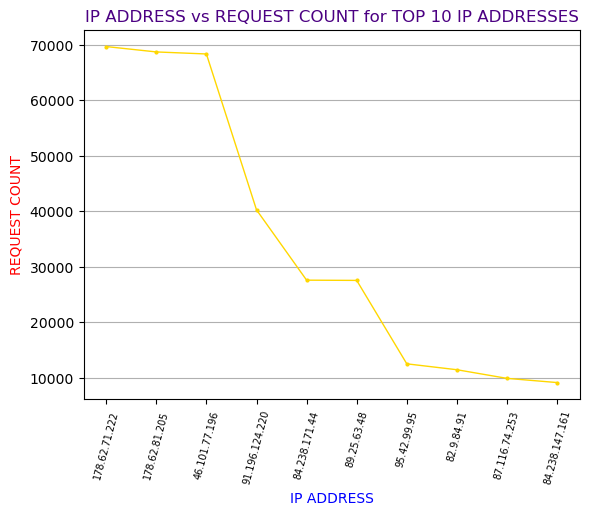

In [130]:
dt1=data1.head(10)
x=dt1["ip_address"]
y=dt1['request_count']
plt.plot(x,y,color="gold",linewidth=1,marker="o",markersize=2)
plt.xticks(rotation=75,fontsize=7)
plt.xlabel("IP ADDRESS", color="blue")
plt.ylabel("REQUEST COUNT" , color="red")
plt.title("IP ADDRESS vs REQUEST COUNT for TOP 10 IP ADDRESSES" , color="indigo")
plt.grid(axis = 'y')
plt.show()

In [67]:
data1.tail(10)

,ip_address,request_count
14235,52.56.97.59,1
14236,45.83.216.21,1
14237,35.237.150.68,1
14238,158.58.196.227,1
14239,34.139.39.227,1
14240,156.146.39.158,1
14241,35.237.89.209,1
14242,35.196.154.119,1
14243,34.139.85.48,1
14244,173.252.95.8,1


In [97]:
data1=logs_df["client"].value_counts().reset_index()
data1.columns = ['ip_address', 'request_count']
data1.head(10)

,ip_address,request_count
0,178.62.71.222,69632
1,178.62.81.205,68664
2,46.101.77.196,68298
3,91.196.124.220,40230
4,84.238.171.44,27567
5,89.25.63.48,27523
6,95.42.99.95,12501
7,82.9.84.91,11437
8,87.116.74.253,9882
9,84.238.147.161,9127


In [64]:
data1=logs_df["client"].value_counts().reset_index()
data1.columns = ['ip_address', 'request_count']
data1.sort_values(by='request_count', ascending=True)

,ip_address,request_count
14244,173.252.95.8,1
12147,40.77.188.121,1
12146,109.104.220.239,1
12145,37.63.15.221,1
12144,89.25.73.158,1
...,...,...
4,84.238.171.44,27567
3,91.196.124.220,40230
2,46.101.77.196,68298
1,178.62.81.205,68664


In [81]:
data3=logs_df.groupby("datetime")
data3

datetime
2022-02-28 14:04:44+02:00      1
2022-02-28 14:04:47+02:00      1
2022-02-28 14:06:44+02:00      1
2022-02-28 14:06:45+02:00      1
2022-02-28 14:06:46+02:00      1
                            ... 
2022-03-31 15:09:06+03:00      2
2022-03-31 15:09:07+03:00    172
2022-03-31 15:09:08+03:00      1
2022-03-31 15:09:09+03:00      7
2022-03-31 15:09:10+03:00      1
Length: 426498, dtype: int64

In [26]:
data5=logs_df["referer"].value_counts().reset_index()
data5.columns = ['http codes', 'request_count']
data5.sort_values(by='request_count', ascending=False)

,http codes,request_count
0,https://nargile.bg/,157982
1,-,151777
2,https://nargile.bg/category/nargileta/,80478
3,https://nargile.bg/category/nargileta/page/2/,75251
4,https://nargile.bg/category/nargileta/page/3/,40250
...,...,...
35119,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,1
35120,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,1
35121,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,1
35122,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,1


In [116]:
data5.head(10)

,http codes,request_count
0,https://nargile.bg/,157982
1,-,151777
2,https://nargile.bg/category/nargileta/,80478
3,https://nargile.bg/category/nargileta/page/2/,75251
4,https://nargile.bg/category/nargileta/page/3/,40250
5,https://nargile.bg/category/chashki-za-nargile/,37824
6,https://nargile.bg/category/hmd/,33177
7,https://nargile.bg/category/nargileta/page/4/,30164
8,https://nargile.bg/category/chashki-za-nargile...,29338
9,https://nargile.bg/category/nargileta/page/5/,23366


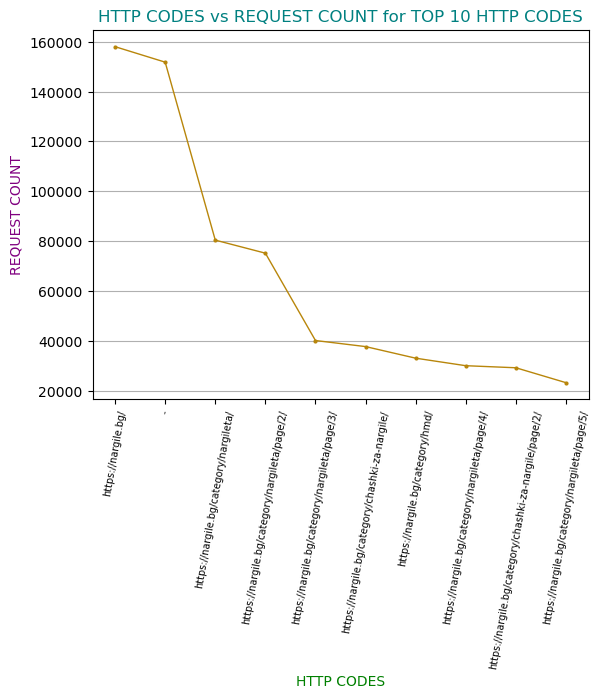

In [131]:
dt2=data5.head(10)
x=dt2["http codes"]
y=dt2['request_count']
plt.plot(x,y,color="darkgoldenrod",linewidth=1,marker="o",markersize=2)
plt.xticks(rotation=80,fontsize=7)
plt.xlabel("HTTP CODES", color="green")
plt.ylabel("REQUEST COUNT" , color="purple")
plt.title("HTTP CODES vs REQUEST COUNT for TOP 10 HTTP CODES" , color="teal")
plt.grid(axis = 'y')
plt.show()

In [6]:
data=logs_df["referer"].unique()
total_httpcode=len(data)
print("Total no of http codes are =",total_httpcode)
print("Values of them are =",data)

Total no of http codes are = 67909
Values of them are = ['https://nargile.bg/product/ocean-hookah-lit-black-hmd-za-nargile/'
 'https://nargile.bg/wp-content/uploads/2022/03/xts-theme_settings_default-1646836406.css?ver=6.3.1'
 'https://nargile.bg/category/bengala-bowl/page/2/' ...
 'https://nargile.bg/wp-cron.php?doing_wp_cron=1646922057.1513819694519042968750'
 'https://nargile.bg/wp-cron.php?doing_wp_cron=1646922084.0401470661163330078125'
 'https://nargile.bg/wp-cron.php?doing_wp_cron=1646922139.8638219833374023437500']


In [38]:
data6=logs_df["request"].value_counts().reset_index()
data6.columns = ['URL', 'hits_count']
data6.sort_values(by='hits_count', ascending=False)

,URL,hits_count
0,/wp-admin/admin-ajax.php,52292
1,/wp-content/uploads/2021/05/HLGN-Logo.png,31492
2,/,22741
3,/?wc-ajax=get_refreshed_fragments,22431
4,/?nitroWebhook=cache_ready&token=fdccd0f43d669...,20737
...,...,...
53095,/wp-json/jetpack/v4/jitm?message_path=wp%3Awoo...,1
53094,/wp-admin/admin.php?_wpnonce=2d2c29c80e&page=w...,1
53093,/wp-json/jetpack/v4/jitm?message_path=wp%3Awoo...,1
53092,/wp-admin/admin.php?_wpnonce=2d2c29c80e&page=w...,1


In [110]:
print("URL with maximum hits is =")
print(data6.head(1))

URL with maximum hits is =
                                            Platform  hits_count
0  Mozilla/5.0 (iPhone; CPU iPhone OS 15_3_1 like...      372584


In [134]:
data6.head(10)

,URL,hits_count
0,/wp-admin/admin-ajax.php,52292
1,/wp-content/uploads/2021/05/HLGN-Logo.png,31492
2,/,22741
3,/?wc-ajax=get_refreshed_fragments,22431
4,/?nitroWebhook=cache_ready&token=fdccd0f43d669...,20737
5,/superpwa-sw.js,19328
6,/category/nargileta/,7156
7,/wp-content/plugins/woocommerce-econt/inc/js/c...,5828
8,/wp-content/plugins/woocommerce-econt/inc/js/s...,5820
9,/wp-content/plugins/woocommerce-econt/inc/js/t...,5819


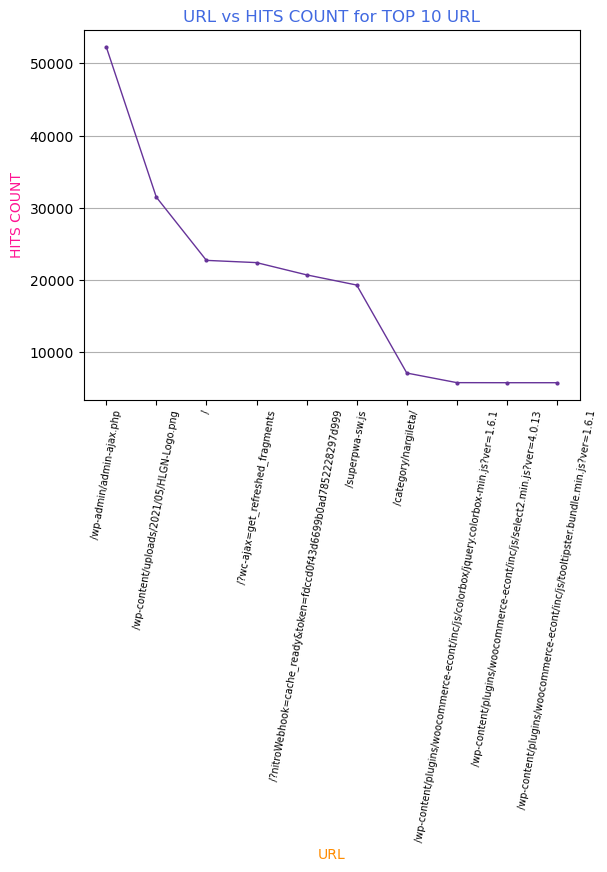

In [132]:
dt3=data6.head(10)
x=dt3["URL"]
y=dt3['hits_count']
plt.plot(x,y,color="rebeccapurple",linewidth=1,marker="o",markersize=2)
plt.xticks(rotation=80,fontsize=7)
plt.xlabel("URL", color="darkorange")
plt.ylabel("HITS COUNT" , color="deeppink")
plt.title("URL vs HITS COUNT for TOP 10 URL" , color="royalblue")
plt.grid(axis = 'y')
plt.show()

In [17]:
data6=logs_df["user_agent"].value_counts().reset_index()
data6.columns = ['Platform', 'hits_count']
data6.sort_values(by='hits_count', ascending=False)

,Platform,hits_count
0,Mozilla/5.0 (iPhone; CPU iPhone OS 15_3_1 like...,372584
1,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,115481
2,Mozilla/5.0 (Linux; Android 8.0.0; Pixel 2 XL ...,108091
3,Mozilla/5.0 (iPhone; CPU iPhone OS 15_4 like M...,72624
4,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,45262
...,...,...
3447,Mozilla/5.0 (Linux; Android 9; SM-A530F) Apple...,1
3446,Mozilla/5.0 (iPhone; CPU iPhone OS 14_8_1 like...,1
3445,Mozilla/5.0 (Linux; Android 11; RMX3241) Apple...,1
3444,Mozilla/5.0 (Linux; Android 10; ONEPLUS A6013 ...,1


In [54]:
ua_df = pd.json_normalize([user_agent_parser.Parse(ua) for ua in logs_df['user_agent']])
ua_df.columns = 'ua_' + ua_df.columns.str.replace('user_agent\.', '', regex=True)

In [112]:
ua_df.head(3)

,ua_string,ua_family,ua_major,ua_minor,ua_patch,ua_os.family,ua_os.major,ua_os.minor,ua_os.patch,ua_os.patch_minor,ua_device.family,ua_device.brand,ua_device.model
0,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B
1,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B
2,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B


In [69]:
data7=ua_df["ua_os.family"].value_counts().reset_index()
data7.columns = ['Platform', 'hits_count']
data7.sort_values(by='hits_count', ascending=False)

,Platform,hits_count
0,iOS,902375
1,Android,756726
2,Windows,440540
3,Mac OS X,214314
4,Other,104502
5,Ubuntu,2468
6,Linux,2459
7,Chrome OS,1584
8,Fedora,484
9,Tizen,184


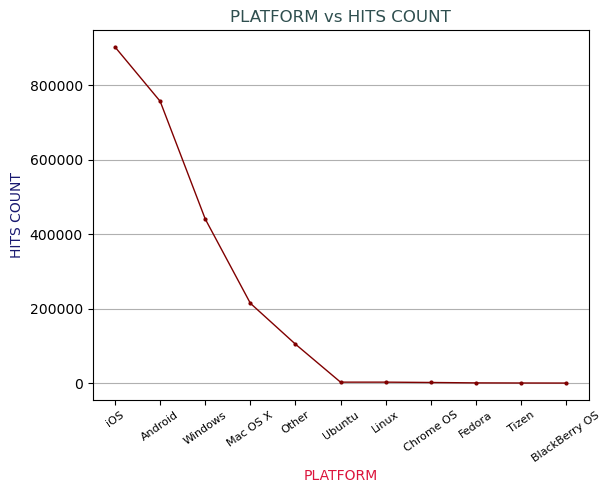

In [129]:
dt4=data7.copy()
x=dt4["Platform"]
y=dt4['hits_count']
plt.plot(x,y,color="maroon",linewidth=1,marker="o",markersize=2)
plt.xticks(rotation=35,fontsize=8)
plt.xlabel("PLATFORM", color="crimson")
plt.ylabel("HITS COUNT" , color="midnightblue")
plt.title("PLATFORM vs HITS COUNT" , color="darkslategray")
plt.grid(axis = 'y')
plt.show()

In [68]:
data8=ua_df["ua_family"].value_counts().reset_index()
data8.columns = ['Browser', 'hits_count']
data8.sort_values(by='hits_count', ascending=False)

,Browser,hits_count
0,Mobile Safari,612288
1,Chrome Mobile,557530
2,Chrome,495569
3,Instagram,131330
4,Facebook,80959
...,...,...
91,MetadataScraper,1
89,SeaMonkey,1
88,GmailImageProxy,1
87,UP.Browser,1


In [117]:
data8.head(10)

,Browser,hits_count
0,Mobile Safari,612288
1,Chrome Mobile,557530
2,Chrome,495569
3,Instagram,131330
4,Facebook,80959
5,Google,62833
6,Chrome Mobile iOS,58484
7,Chrome Mobile WebView,56183
8,Firefox,55846
9,Opera,49036


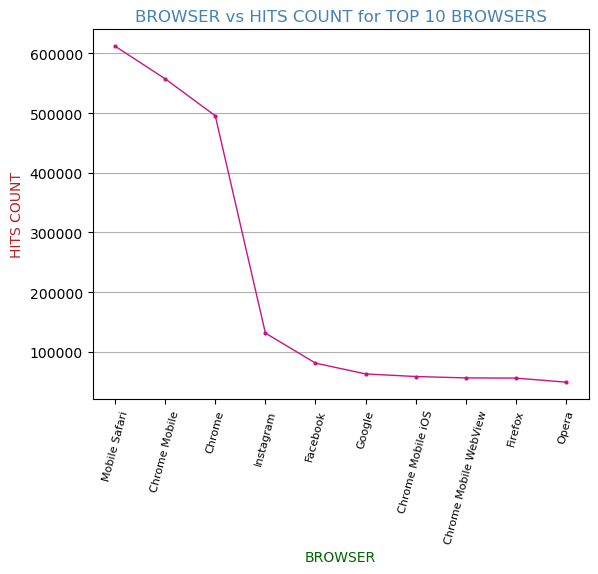

In [128]:
dt5=data8.head(10)
x=dt5["Browser"]
y=dt5['hits_count']
plt.plot(x,y,color="mediumvioletred",linewidth=1,marker="o",markersize=2)
plt.xticks(rotation=75,fontsize=8)
plt.xlabel("BROWSER", color="darkgreen")
plt.ylabel("HITS COUNT" , color="firebrick")
plt.title("BROWSER vs HITS COUNT for TOP 10 BROWSERS" , color="steelblue")
plt.grid(axis = 'y')
plt.show()

In [77]:
logs_df['datetime'] = logs_df['datetime'].dt.tz_convert('UTC')
logs_df['hour'] = logs_df['datetime'].dt.hour
hits_per_hr = logs_df['hour'].value_counts().reset_index()
hits_per_hr.columns = ['Hits per hr', 'hits_count']
hits_per_hr.sort_values(by='hits_count', ascending=False)

,Hits per hr,hits_count
0,14,199640
1,13,195853
2,15,180966
3,12,154217
4,19,153525
5,17,152252
6,18,151349
7,16,146061
8,20,140750
9,10,140118


In [66]:
print("Top 10 hits on hourly basis :")
hits_per_hr.head(10)

Top 10 hits on hourly basis :


,Hits per hr,hits_count
0,14,199640
1,13,195853
2,15,180966
3,12,154217
4,19,153525
5,17,152252
6,18,151349
7,16,146061
8,20,140750
9,10,140118


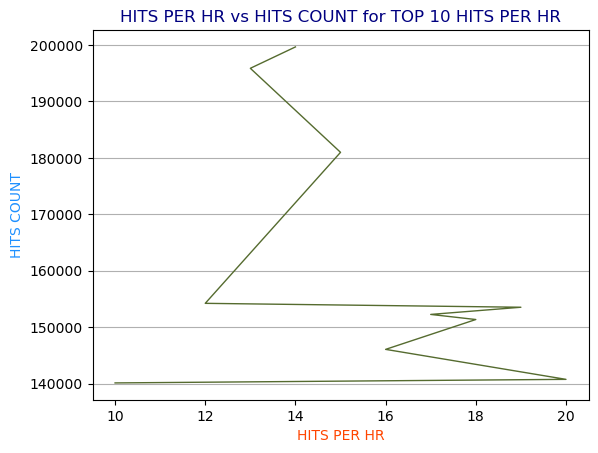

In [133]:
dt6=hits_per_hr.head(10)
x=dt6["Hits per hr"]
y=dt6['hits_count']
plt.plot(x,y,color="darkolivegreen",linewidth=1)
plt.xlabel("HITS PER HR", color="orangered")
plt.ylabel("HITS COUNT" , color="dodgerblue")
plt.title("HITS PER HR vs HITS COUNT for TOP 10 HITS PER HR" , color="navy")
plt.grid(axis = 'y')
plt.show()

In [122]:
data8=logs_df.copy()
data8['hour'] = data8['datetime'].dt.hour
#data8.head(3)

site_hourly_traffic = data8.groupby(['referer', 'hour'])['size'].sum().reset_index()

total_traffic_per_hour = data8.groupby('hour')['size'].sum().reset_index()

traffic_distribution = pd.merge(site_hourly_traffic, total_traffic_per_hour, 
                                on='hour', suffixes=('_site', '_total'))
traffic_distribution['distribution'] = traffic_distribution['size_site'] / traffic_distribution['size_total']

print(traffic_distribution)

                                                 referer  hour    size_site  \
0                                                            0     195005.0   
1                                                      -     0  556125475.0   
2      android-app://com.google.android.googlequickse...     0      79100.0   
3                                            binance.com     0         52.0   
4                              http://91.196.124.134:80/     0     435287.0   
...                                                  ...   ...          ...   
85243  https://nargile.bg/wp-cron.php?doing_wp_cron=1...     3          0.0   
85244                             https://www.google.bg/     3      77415.0   
85245                            https://www.google.com/     3    3499922.0   
85246                             https://www.google.dk/     3      97137.0   
85247                            https://www.tiktok.com/     3      79100.0   

         size_total  distribution  
0      1.588703